In [1]:
import tensorflow as tf

**Loading MNIST Dataset loaded using keras**<br>
<b>Training sample=>60,000<b><br>
<b>Testing sample=>10,000 <b>
    


In [2]:
mnist=tf.keras.datasets.mnist ##handwritten characters based on 28x28 sized images of 0 to 9

**Dividing into train and test**

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data() 

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
import matplotlib.pyplot as plt

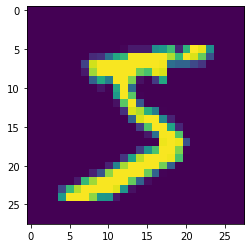

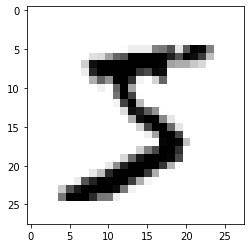

In [6]:
##checking the graph of how data looks like
plt.imshow(x_train[0]) ##first index
plt.show()
##we don't know if the image is color image or binary so we change the configurations 
plt.imshow(x_train[0],cmap=plt.cm.binary) ##converting the image into binary and show

**Checking the value of each pixel before normalization** <br>
<b>if near 255->white and 0->black <b>

In [7]:
##Before Normalization
print(x_train[0]) ##after cm operation the pixels are revarted

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

<b>As images are in Gray level(1 channel=>0 to 255),not RGB<b><br>
    **Normalize the data | Pre-Processing Step**

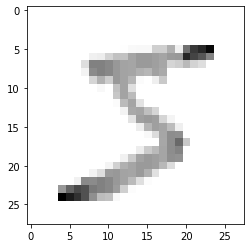

In [13]:
##it's gray image and all the calues varies from 0 to 255
##in order to normalize it we will use the built in function.but we could also use x_train/255 method
##axis 0->col and 1->row
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

**After Normalization**

In [14]:
print(x_train[0]) ##all the values are normalized in between 0-1

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [15]:
print(y_train[0]) ##checking the labels

5


**Resizing img to make it suitable for applying Convolution Operations**

In [16]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1) ##increasing one dimension for karnel operation
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1) ##increasing one dimension for karnel operation
print("Training Samples dimension",x_trainr.shape)
print("Testing Samples diemension",x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples diemension (10000, 28, 28, 1)


**Create a Deep Neural Network**<br>
**Training on 60,000 samples of MNIST handwritte dataset**

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [18]:
##creating the neural network
model=Sequential()
##Conv2D(64->filters and (3,3)karnel size)

###First Convolution Layer   (60,000,28,28,1)  28-3+1= 26x26 nw for max_pooling is becomes 13x13
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))##only for first convolutional layer input size should be mentioned
model.add(Activation("relu")) ##activation function -> to make it non-linear,v<0 drop those and v>0 it will allow for next layer
model.add(MaxPooling2D(pool_size=(2,2))) #MaxPooling->single maximum value of 2x2,else are removed 

###Seconf Convolution Layer   (60,000,28,28,1)  26-3+1= 24x24
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))##only for first convolutional layer input size should be mentioned
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2))) 

###Third Convolution Layer   (60,000,28,28,1) 24-3+1= 22x22
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))##only for first convolutional layer input size should be mentioned
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2))) 

###Fully connected Layer #1  if it gets 20x20 then we get 20x20=400 so it converts 2D to 1D value
model.add(Flatten())##before using fully connected Layer,need to be flatten so that
model.add(Dense(64))##
model.add(Activation("relu"))

###Fully connected Layer #2
model.add(Dense(32))
model.add(Activation("relu"))

##Last Fully Connected Layer ,Output must be equal to number of classes,10(0-9)
model.add(Dense(10)) #This is the last layer
model.add(Activation('softmax')) ##activation function is changed to softmax(class probabilites)




In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [19]:
print("Total Training Samples = ",len(x_trainr))

Total Training Samples =  60000


In [20]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

**Training Model**

In [21]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3) ##training the model

Epoch 1/5
1313/1313 [==============================] - 53s 40ms/step - loss: 0.3311 - accuracy: 0.8936 - val_loss: 0.1400 - val_accuracy: 0.9557
Epoch 2/5
1313/1313 [==============================] - 53s 40ms/step - loss: 0.1053 - accuracy: 0.9679 - val_loss: 0.1005 - val_accuracy: 0.9706
Epoch 3/5
1313/1313 [==============================] - 53s 40ms/step - loss: 0.0737 - accuracy: 0.9776 - val_loss: 0.0717 - val_accuracy: 0.9787
Epoch 4/5
1313/1313 [==============================] - 57s 43ms/step - loss: 0.0598 - accuracy: 0.9816 - val_loss: 0.0729 - val_accuracy: 0.9782
Epoch 5/5
1313/1313 [==============================] - 54s 41ms/step - loss: 0.0496 - accuracy: 0.9851 - val_loss: 0.0628 - val_accuracy: 0.9823


In [22]:
###Evaluating on testing dataset MNIST
test_loss,test_acc=model.evaluate(x_testr,y_test)
print("Test Loss on 10,000 test samples",test_loss)
print("Validation Accuracy on 10,000 test samples",test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.0567 - accuracy: 0.9830
Test Loss on 10,000 test samples 0.05671992897987366
Validation Accuracy on 10,000 test samples 0.9829999804496765


**Check if the model predicts the actual value or not**

In [23]:
###predictions=new_model.predict([x_test])
predictions=model.predict([x_testr])

In [24]:
print(predictions) ###these are actually array values,containing softmax probabilities properties

[[9.74264835e-11 1.08035658e-06 1.37691060e-07 ... 9.99998808e-01
  4.10428358e-09 3.28460703e-09]
 [2.58009204e-05 1.33125036e-06 9.99970675e-01 ... 3.00966860e-07
  1.04498454e-07 5.40384058e-08]
 [2.45323903e-08 9.99998093e-01 1.97321071e-07 ... 1.38181451e-06
  1.47762478e-08 1.55192514e-09]
 ...
 [1.27574857e-08 1.99512888e-05 3.71298703e-09 ... 8.91851505e-06
  7.38568531e-07 1.34754271e-06]
 [3.41767482e-05 3.84942247e-08 6.97546731e-09 ... 2.55977617e-09
  3.92083566e-05 7.66720041e-05]
 [3.41466730e-05 5.67141676e-08 1.06066627e-05 ... 1.23803574e-07
  6.92157244e-07 3.19116430e-06]]


In [25]:
###in order to understand the value we need to convert the predictions using numpy
print(np.argmax(predictions[0])) ##argmax will return the maximum value index and find the value of it 

7


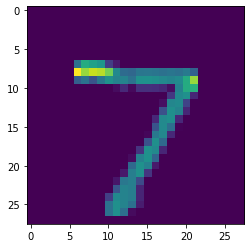

In [26]:
###now check that if the answer is true or not 
plt.imshow(x_test[0])

In [27]:
###now chccking the predicted value of the model of the 128th image in the dataset
print(np.argmax(predictions[128]))

8


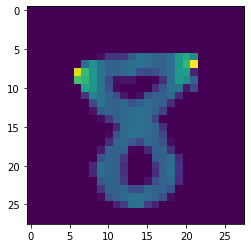

In [28]:
###Checking if the answer is true or false
plt.imshow(x_test[128])

**Checking with custom number**

In [29]:
import cv2 ##pip install opencv-python

In [30]:
img=cv2.imread('input_img.png')

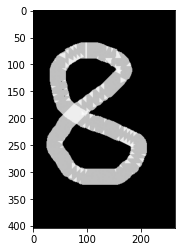

In [31]:
plt.imshow(img)

**Resizing the customized image**

In [32]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) ##convert into gray first

In [33]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA) ##then resize

In [34]:
resized.shape

(28, 28)

**Normalize the new given image**

In [35]:
newimg=tf.keras.utils.normalize(resized,axis=1) ##0 to 1 scaling ###NORMALIZE

In [36]:
newimg=np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1) ##karnel operation of convolution layer  ##adding extra padding 

In [37]:
newimg.shape

(1, 28, 28, 1)

**Prediction by model**

In [38]:
predictions=model.predict(newimg)

In [39]:
print(np.argmax(predictions))

8
